In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
data_vkco = pd.read_csv("../data/VKCO.IL.csv")
data_tcs_il = pd.read_csv("../data/TCS.IL.csv")
data_poly_il = pd.read_csv("../data/POLY.L.csv")
data_five_il = pd.read_csv("../data/FIVE.IL.csv")

In [3]:
def get_return(dataframe, column):
    log_return = []
    data = dataframe[column]
    for i in range(1, len(data)):
        log_return.append((data[i] / data[i - 1]) - 1)
    return log_return

In [4]:
return_vkco = pd.DataFrame({'return_vkco': get_return(data_vkco, 'Close')})
return_tcs_il = pd.DataFrame({'return_tcs_il': get_return(data_tcs_il, 'Close')})
return_poly_il = pd.DataFrame({'return_poly_il': get_return(data_poly_il, 'Close')})
return_five_il = pd.DataFrame({'return_five_il': get_return(data_five_il, 'Close')})

In [5]:
all_data_return = pd.DataFrame()
all_data_return = pd.concat([return_vkco, return_tcs_il, return_poly_il, return_five_il], axis=1)
all_data_return

,return_vkco,return_tcs_il,return_poly_il,return_five_il
0,-0.012037,-0.004154,-0.003705,-0.013288
1,-0.034677,0.000000,-0.028926,-0.023782
2,0.011650,0.002085,-0.013191,0.007925
3,-0.006718,0.004162,0.026304,-0.002912
4,-0.009662,0.015544,-0.010924,-0.007009
...,...,...,...,...
248,-0.007619,0.018828,0.030497,0.010245
249,0.019194,0.045175,0.029891,-0.006197
250,0.018832,0.039293,0.008621,0.037415
251,0.048059,0.035917,0.043305,0.000000


In [6]:
def profit_and_loss(dataframe):
    p_and_l = []
    for i in range(len(dataframe)):
        p_and_l.append(dataframe.head(i).sum())
    return p_and_l

In [7]:
investment_portfolio = (all_data_return * [0.25, 0.25, 0.25, 0.25]).sum(axis=1)
data_p_and_l = profit_and_loss(investment_portfolio)
len(data_p_and_l)

253

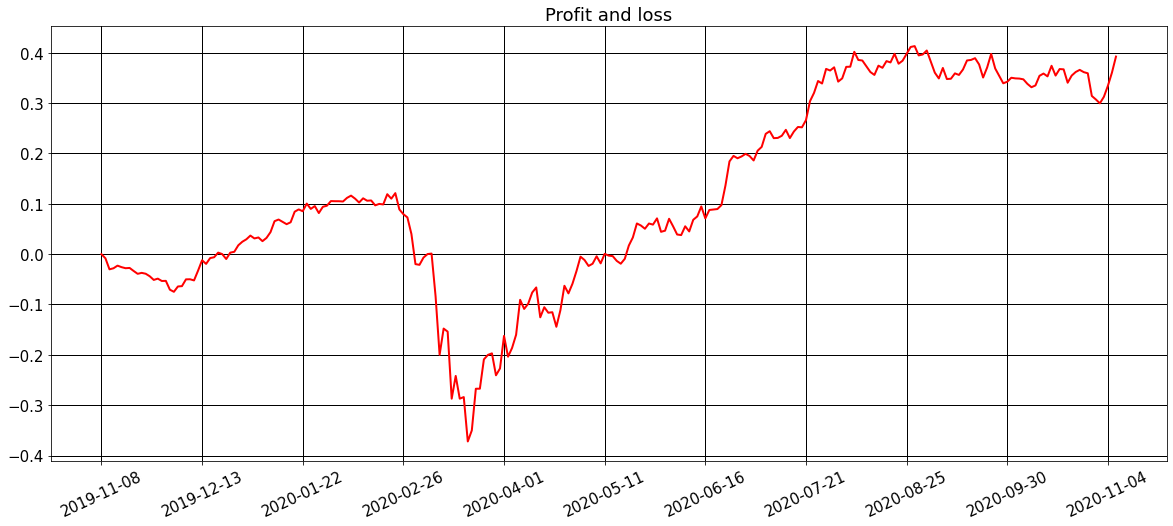

In [8]:
plt.rcParams['font.size'] = '15'
fig, ax = plt.subplots()

ax.plot(data_vkco.Date.tail(253), data_p_and_l, 'r', linewidth=2, label='real')

ax.grid(color = 'black',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = '-')    #  начертание


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(20)
fig.set_figheight(8)

plt.title("Profit and loss")
plt.show()